# <img style="float: left; padding-right: 10px; width: 45px" src="style/iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression

**Rener Oliveira**<br/>
**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in Classroom.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



In [ ]:
# # #Just code to work on my personal Drive
# # from google.colab import drive
# import os
# # drive.mount('/content/drive')
# os.chdir('drive/My Drive/FGV/DS_Fundamentals/cs109a_hw2/')
# # !pwd

<hr style="height:2pt">

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers 1

**1.1**

In [ ]:
data = pd.read_csv("data/dataset_1.csv")
train_data,test_data = train_test_split(data,test_size=0.2,random_state=42)

x_train = np.array(train_data.TimeMin)
x_train = x_train.reshape(x_train.shape[0],1)
y_train = np.array(train_data.PickupCount)

x_test = np.array(test_data.TimeMin)
x_test = x_test.reshape(x_test.shape[0],1)
y_test = np.array(test_data.PickupCount)

**1.2**

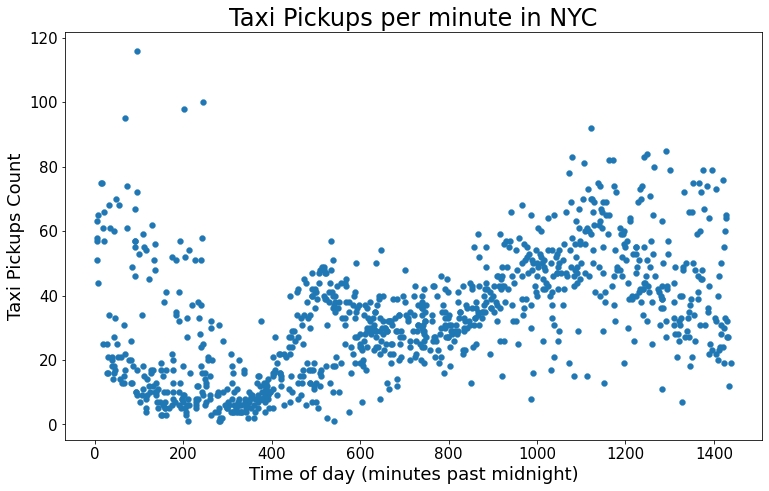

In [ ]:
## Code for your plot here
fig, ax = plt.subplots(1,1,figsize=(12.5,7.5))

ax.tick_params(labelsize=15)
ax.set_xlabel('Time of day (minutes past midnight)',fontsize=18)
ax.set_ylabel('Taxi Pickups Count',fontsize=18)
ax.set_title('Taxi Pickups per minute in NYC',fontsize=24)

ax.scatter(x_train,y_train,lw=0.3);

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

   Although we've some outliers between 0 and 360 min(midnight and 6AM) the pickup counts stay low in this period. 
   
   After 360 min (6AM) the count starts to increase until 1200min (8AM).

   After 8AM we can observe a little decrease.

  The pattern make sense, since people grab more taxis at daylight.


<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers 2


**2.1**

In [ ]:
KNNModels = {}
k_values = [1,10,75,250,500,750,1000]

for k in k_values:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(x_train,y_train)
  KNNModels[k]=knn

**2.2**

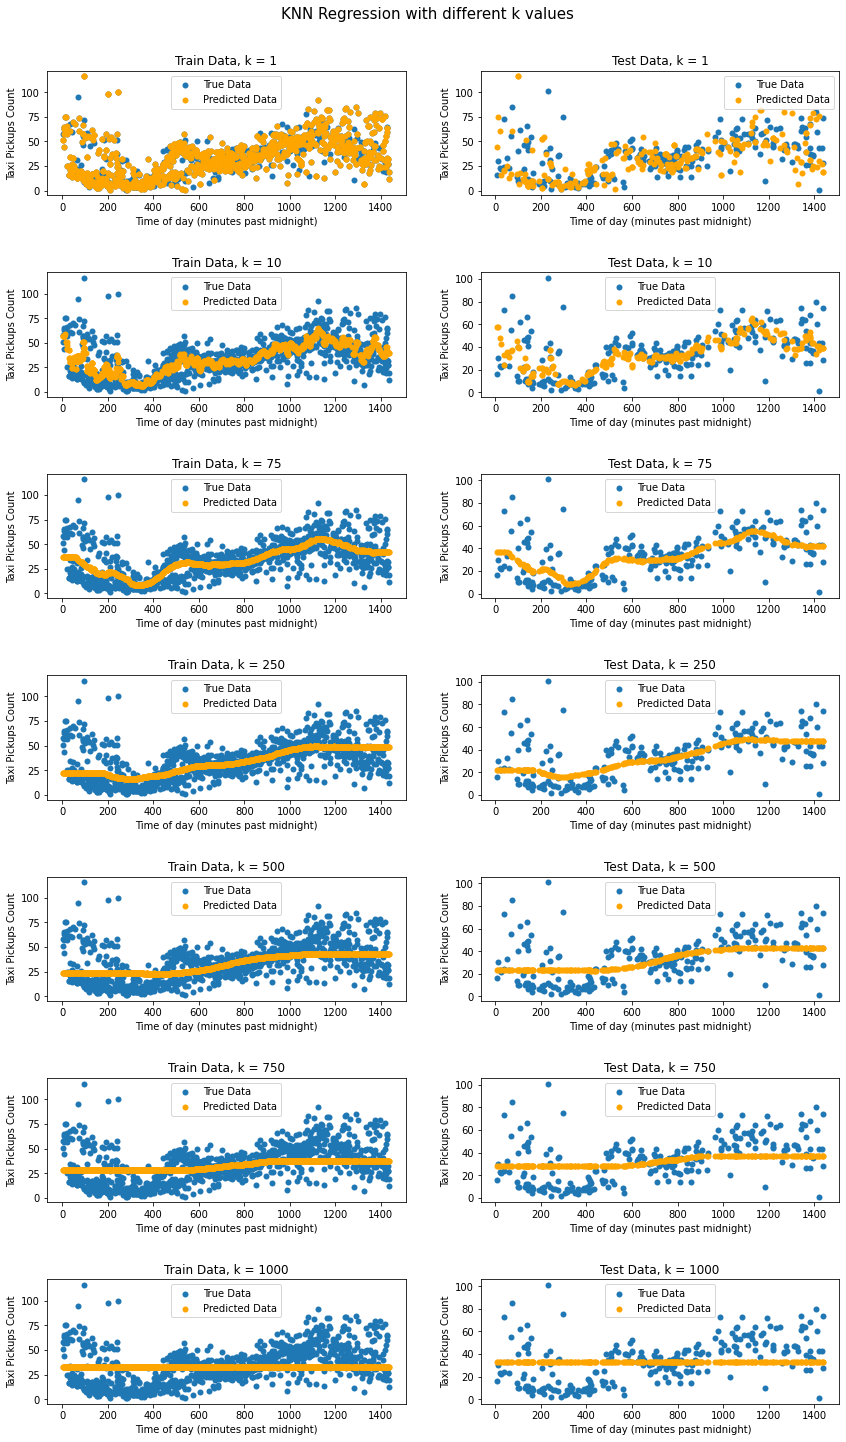

In [ ]:
fig, ax = plt.subplots(len(k_values),2,figsize=(12.5,20))
i=0
fig.suptitle('KNN Regression with different k values',y=1.0125,fontsize=15)
for k,knn in KNNModels.items():
  ax[i][0].set_title('Train Data, k = %d'%k,fontsize=12)
  ax[i][0].set_xlabel('Time of day (minutes past midnight)',fontsize=10)
  ax[i][0].set_ylabel('Taxi Pickups Count',fontsize=10)
  ax[i][1].set_title('Test Data, k = %d'%k,fontsize=12)
  ax[i][1].set_xlabel('Time of day (minutes past midnight)',fontsize=10)
  ax[i][1].set_ylabel('Taxi Pickups Count',fontsize=10)
  fig.tight_layout(pad=3.0)
  ax[i][0].scatter(x_train,y_train,linewidths=0.01,label = "True Data")
  ax[i][0].scatter(x_train,knn.predict(x_train),color='orange',linewidths=0.01, label = "Predicted Data")
  ax[i][0].legend(loc = 'best',fontsize=10)
  ax[i][1].scatter(x_test,y_test,linewidths=0.01,label = "True Data")
  ax[i][1].scatter(x_test,knn.predict(x_test),color='orange',linewidths=0.01, label = "Predicted Data")
  ax[i][1].legend(loc = 'best',fontsize=10)
  i+=1



**2.3**

In [ ]:
scores = np.zeros([len(k_values),3],dtype=float)

i=0
for k,knn in KNNModels.items():
  scores[i][0]=k
  r2_train = knn.score(x_train,y_train)
  scores[i][1]=r2_train
  r2_test = knn.score(x_test,y_test)
  scores[i][2]=r2_test
  i+=1
scr_df=pd.DataFrame(scores,columns=['K Values','Train R2','Test R2'],index=KNNModels.keys()).set_index('K Values')
scr_df

,Train R2,Test R2
K Values,,
1.0,0.712336,-0.418932
10.0,0.509825,0.272068
75.0,0.445392,0.390310
250.0,0.355314,0.340341
500.0,0.290327,0.270321
750.0,0.179434,0.164909
1000.0,0.000000,-0.000384


**2.4**

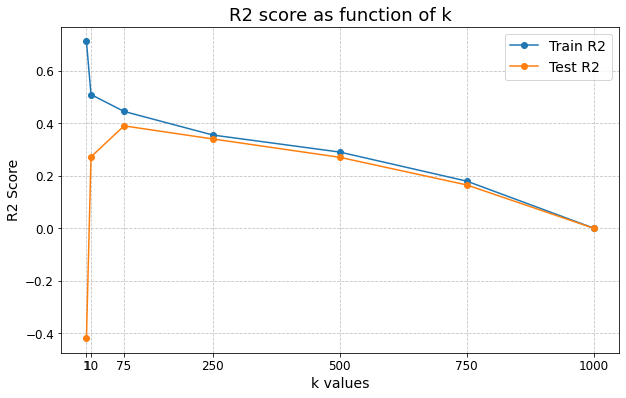

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(k_values,scr_df["Train R2"],'o-',label = "Train R2")
ax.plot(k_values,scr_df["Test R2"],"o-",label = "Test R2")
ax.set_title("R2 score as function of k",fontsize=18)
ax.tick_params(labelsize=12)
ax.set_xlabel("k values",fontsize=14)
ax.set_ylabel("R2 Score",fontsize=14)
ax.set_xticks(k_values)
ax.grid(True,ls="--",alpha=0.75)
ax.legend(loc="best", fontsize=14);



**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

    The Regression will be a constant function equal to the mean value of the y_train
    
2. *What does an $R^2$ score of $0$ mean?*

    It means the model is predicting the mean value for all $x$ in the domain.

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

    A negative $R^2$ score means the model is worst than avarage. This case happend in our test dataset with $k=1$. With this $k$, we can fit the train data nicely, but applying the function to test data makes bad predictions.
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

    Except from the first values, as we increase $k$, both plots exhibit the same trend.
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

    With $k=1$ the model can fit nicely the training set because it's grabbing the nearest neighbor for each point in the domain, we can have a relatively high $R^2$ in this case. But as said on item 3, applying the model to test data outputs a bad prediction, making $R^2$ negative. It overfits the model for the training set and has no prediction power on the test set.

    As the value of $k$ is increased, we get a more general function and the test $R^2$ becomes positive, but decreases as $k$ tend to $n$.

    The training $R^2$ value also decreases as $k$ increase. 

    In general the model tends do the mean value as $k$ tends to $n$.

    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    We're gonna choose the $k$ value that maximizes test $R^2$ score.

    So we have $k=75$ as "the best", with training $R^2$ equal $0.44$ ans test $R^2$ equal $0.39$.
    


    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers 3


**3.1**

In [ ]:
## Code here
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
regr = sm.OLS(y_train,X_train)
OLSModel = regr.fit()
b0,b1 = OLSModel.params 

**3.2**

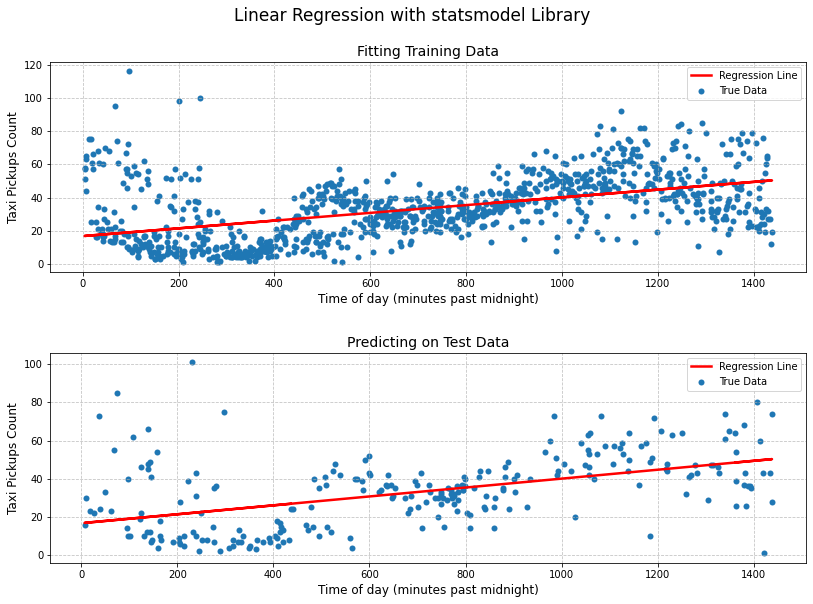

In [ ]:
## Code for your plot here
fig, ax = plt.subplots(2,1,figsize=(12,8.5))
fig.suptitle('Linear Regression with statsmodel Library',y=1.0125,fontsize=17)
ax[0].set_title('Fitting Training Data',fontsize=14)
ax[0].set_xlabel('Time of day (minutes past midnight)',fontsize=12)
ax[0].set_ylabel('Taxi Pickups Count',fontsize=12)
ax[1].set_title('Predicting on Test Data',fontsize=14)
ax[1].set_xlabel('Time of day (minutes past midnight)',fontsize=12)
ax[1].set_ylabel('Taxi Pickups Count',fontsize=12)
ax[1].grid(True,alpha=0.75,ls="--")
ax[0].grid(True,alpha=0.75,ls="--")
fig.tight_layout(pad=3.0)
ax[0].scatter(x_train,y_train,linewidths=0.01,label = "True Data")
ax[0].plot(x_train,b0+b1*x_train,color="red",lw=2.5,label = "Regression Line")
ax[0].legend(loc="best");
ax[1].scatter(x_test,y_test,linewidths=0.01,label = "True Data")
ax[1].plot(x_test,b0+b1*x_test,color="red",lw=2.5,label = "Regression Line")
ax[1].legend(loc="best");



**3.3**

In [ ]:
## Code here
train_R2 = OLSModel.rsquared
y = y_test.reshape(y_test.shape[0],1)
num = np.sum((b0+x_test*b1 - y)**2)
den = np.sum((np.mean(y) - y)**2)
test_R2 = 1 - num/den
print("Training R2: {}\nTest R2: {}".format(train_R2,test_R2))

Training R2: 0.2430260353189334
Test R2: 0.240661535615741


**3.4**

In [ ]:
## Code here
intercept = b0
slope = b1
print("Intercept = {}\nSlope = {}".format(intercept,slope))

Intercept = 16.75060142744682
Slope = 0.023335175692397347


**3.5**

In [ ]:
conf_int = OLSModel.conf_int(0.05)

print("Intercept confidence interval = {}\nSlope confidence interval = {}".format(conf_int[0,:],conf_int[1,:]))

Intercept confidence interval = [14.67514134 18.82606151]
Slope confidence interval = [0.02077697 0.02589338]


**3.6**

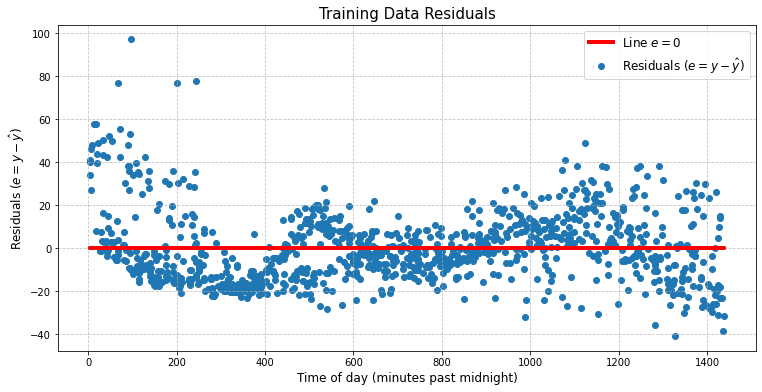

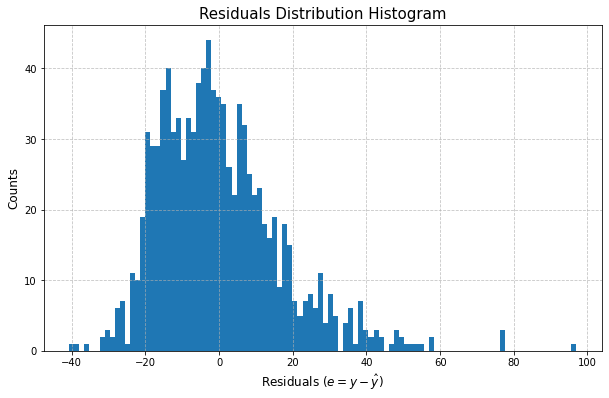

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12.5,6))
ax.set_title("Training Data Residuals",fontsize=15)
ax.set_ylabel(r"Residuals $(e=y-\hat{y})$",fontsize = 12)
ax.set_xlabel(r"Time of day (minutes past midnight)",fontsize = 12)
e = y_train.reshape(y_train.shape[0],1)-(b0+x_train*b1)
ax.grid(True,alpha=0.75,ls="--")
ax.scatter(x_train,e,label = r"Residuals $(e=y-\hat{y})$");
ax.plot(x_train,np.zeros(x_train.shape),color='red',lw=4,label = r"Line $e=0$")
ax.legend(loc="best",fontsize=12);

fig,ax2 = plt.subplots(1,1,figsize=(10,6))
ax2.set_title("Residuals Distribution Histogram",fontsize=15)
ax2.set_xlabel(r"Residuals $(e=y-\hat{y})$",fontsize=12)
ax2.set_ylabel("Counts",fontsize=12)
ax2.grid(True,alpha=0.75,ls="--")
ax2.hist(e,bins=100);

**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    The $R^2$ of linear regression was around $0.24$ while the best test $R^2$ value of k-NN regression was approximately $0.39$. We got a worse result in applying linear regression, maybe data linearity is not a good assumption.

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    The slope is approximately $0.023$ which is positive. The sign ($+$) says that the later it becomes, the more pickups are expected.

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    For the intercept $\approx16.75$, we got the approximate interval $[14.67,18.83]$, and for the slope $\approx 0.023$ we got the interval $[0.021,0.026]$. These intervals are relatively tight, so we got reliable ones, there isn't any absurd here.


4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    If we set $99\%$ confidence intervals, they'll be looser than the $95\%$ ones. That's because on the bootstrapping process we get a normal-like distribution for the coefficients. So if we want a range such that the true value of the parameters is contained in the intervals with .99 probability, we have to grab a larger range.

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    As the residuals plot shows us, the predicted values vary a lot from the actual values. We have lots of negativer error, that's clear on the histogram. Also, the $R^2$ score is too distant from 1. We have some linear sub-patterns on the data (from 500min to 1200min for example), but we can see on the initial plot some outliers to these patterns; Linear regression is very susceptible do outliers, this could explain the residuals and the low R squared.

    Concluding, the assumption of linearity make sense, but the outliers disturb the model. Maybe a polynomial model would fit it better.

<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers 4

**4.1**

In [ ]:
# Reference: https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
                    
    def fit(self):
        
        #################
        # Instead of use inverse matrix, we can solve a linear system, usually it's more efficient
        #################
        
        self.params = np.linalg.solve((self.exog.T).dot(self.exog),self.exog.T.dot(self.endog))
        return self
            
    def predict(self):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        # calculate your predictions based upon exog/self.exog and return them
        # as a numpy array
        return self.exog.dot(self.params)
            
        
        
def CS109r2score(y_true, y_pred):
    # y_true should be your actual y data (endogenous data)
    # y_pred should be the corresponding predictions from your model
    
    # calculate the r^2 score an return it
    num = np.sum((y_pred - y_true)**2)
    den = np.sum((np.mean(y_true) - y_true)**2)
    return 1 - num/den

**4.2**

In [ ]:
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
CS109OLSModel = CS109OLS(y_train,X_train)
CS109OLSModel.fit()

**4.3**

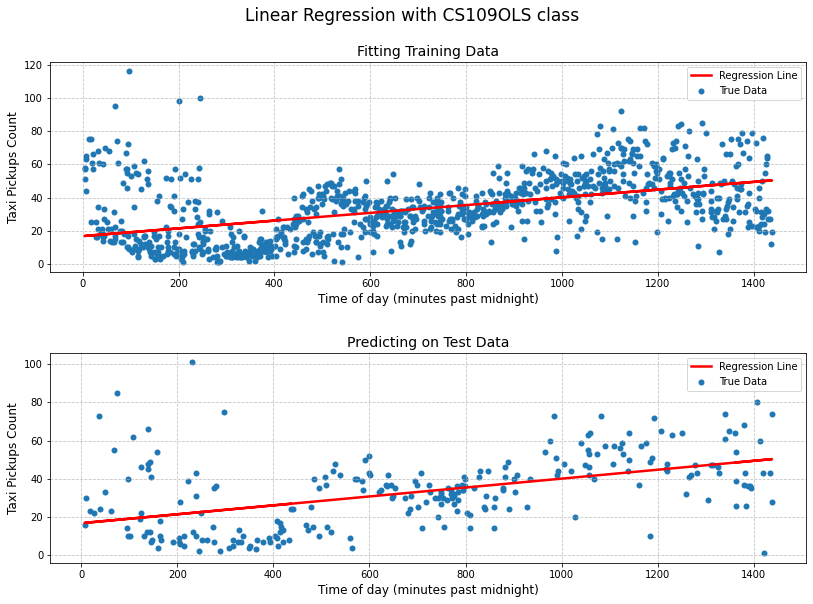

In [ ]:
params = CS109OLSModel.params

fig, ax = plt.subplots(2,1,figsize=(12,8.5))
fig.suptitle('Linear Regression with CS109OLS class',y=1.0125,fontsize=17)
ax[0].set_title('Fitting Training Data',fontsize=14)
ax[0].set_xlabel('Time of day (minutes past midnight)',fontsize=12)
ax[0].set_ylabel('Taxi Pickups Count',fontsize=12)
ax[1].set_title('Predicting on Test Data',fontsize=14)
ax[1].set_xlabel('Time of day (minutes past midnight)',fontsize=12)
ax[1].set_ylabel('Taxi Pickups Count',fontsize=12)
ax[1].grid(True,alpha=0.75,ls="--")
ax[0].grid(True,alpha=0.75,ls="--")
fig.tight_layout(pad=3.0)
ax[0].scatter(X_train[:,1],y_train,linewidths=0.01,label = "True Data")
ax[0].plot(X_train[:,1],X_train.dot(params),color="red",lw=2.5,label = "Regression Line")
ax[0].legend(loc="best");
ax[1].scatter(X_test[:,1],y_test,linewidths=0.01,label = "True Data")
ax[1].plot(X_test[:,1],X_test.dot(params),color="red",lw=2.5,label = "Regression Line")
ax[1].legend(loc="best");


The figure compared to 3.2 is the same. Althought we used linear algebra to compute the predictions, the result is equal because the parameters are the same from statsmodel.

We also used the same plot code, just changing the lines where the predictions are made.

**4.4**

In [ ]:
mymodel = CS109OLS(y_train, X_train)
mymodel.fit()
predictions = mymodel.predict()
R2score = CS109r2score(y_train, predictions)
print("mymodel R2 train ---- {}\nstatsmodel R2 train - {}".format(R2score,train_R2))

mymodel R2 train ---- 0.24302603531893352
statsmodel R2 train - 0.2430260353189334


As we can see, the CS109OLS $R^2$ it's the same from statsmodels with 15 decimal places precision.

That was expected since mathematically, we're doing the same modeling as statsmodels.

**4.5**

In [ ]:
print("Statsmodels Intercept .. {}\nCS109OLS Intercept ..... {}".format(intercept,params[0]))
print("\nStatsmodels Slope ...... {}\nCS109OLS Slope ......... {}".format(slope,params[1]))

Statsmodels Intercept .. 16.75060142744682
CS109OLS Intercept ..... 16.750601427446824

Statsmodels Slope ...... 0.023335175692397347
CS109OLS Slope ......... 0.02333517569239734


As we see, we get the same parameters as statsmodels with high precision on decimal places. 

Again, an expected result, since we're doing the same thing mathematically.

<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers 5

**5.1**

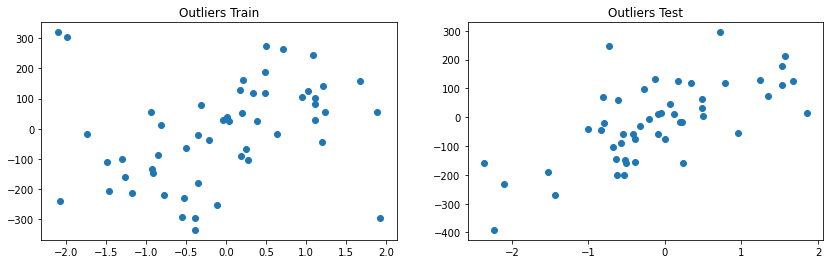

In [ ]:
outl_train = pd.read_csv("data/outliers_train.csv")
outl_test = pd.read_csv("data/outliers_test.csv")
fix, ax = plt.subplots(1,2,figsize=(14,4))
ax[0].set_title("Outliers Train")
ax[0].scatter(outl_train.X,outl_train.Y)
ax[1].set_title("Outliers Test")
ax[1].scatter(outl_test.X,outl_test.Y);

*What does a visual inspection of training set tell you about the existence of outliers in the data?*


  We can observe that Y grows as X grows, on both sets.
    
    But, on Trainig set, we have 2 super high Y values on the left up side of 
    the plot, where intuitively, Y show be lower.

    Also we have a super low Y value on the bottom right side of the plot,
    breaking the intuitive pattern of higher Y.
    

    



**5.2**

In [ ]:
x_train = np.array(outl_train.X)
y_train = np.array(outl_train.Y)
X_train = sm.add_constant(x_train)
regr = sm.OLS(y_train,X_train)
OutlierOLSModel = regr.fit()

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*


---


   

>  We're gonna re-model the data for every possible combination of $n-3$ points of the set, where $n$ is the number of observations on the training set.

>    We just have to count how many different subsets of $n-3$ elements we can get from a set of $n$, this can be computed by:
    
>    $\displaystyle {n\choose{n-3}}=\dfrac{n!}{(n-3)!3!}$

>    Since we have $53$ observations on the training set, we plug $n=53$ on the bove expression and get:

>    $\dfrac{53!}{50!3!}=\dfrac{53\cdot52\cdot51}{6}=23426$

>    So, we're gonna have to calculate the Linear Regression coefficients on the training data, $23426$ times


**5.4**

In [ ]:
def find_outliers_simple(dataset_x,dataset_y):
  augmented_x = sm.add_constant(dataset_x)
  regr = sm.OLS(dataset_y,augmented_x)
  model = regr.fit()
  e = pd.DataFrame(np.abs(dataset_y-(augmented_x.dot(model.params))),columns = ["Error abs"])
  return list(e.sort_values(by="Error abs",ascending=0).iloc[0:3].index)

outliers_indexes = find_outliers_simple(x_train,y_train)
x_train2 = np.delete(x_train,outliers_indexes)
X_train2 = sm.add_constant(x_train2)
y_train2 = np.delete(y_train,outliers_indexes)
regr = sm.OLS(y_train2,X_train2)
OutlierFreeSimpleModel = regr.fit()

**5.5**

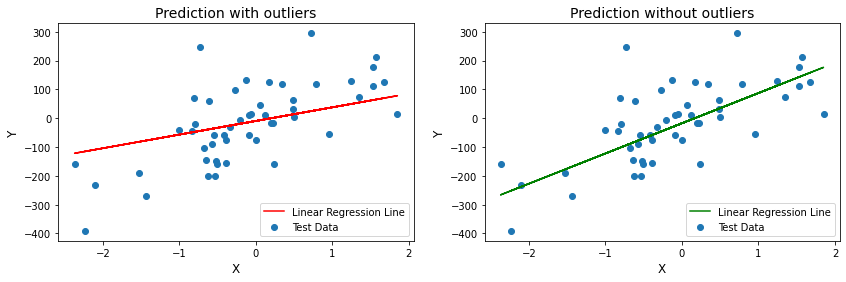

In [ ]:
x_test = np.array(outl_test.X)
y_test = np.array(outl_test.Y)
X_test = sm.add_constant(x_test)
fig, ax = plt.subplots(1,2,figsize=(14,4))
#fig.suptitle('Linear Regression with/without outliers',y=1.05,fontsize=17)
ax[0].set_title('Prediction with outliers',fontsize=14)
ax[0].set_xlabel('X',fontsize=12)
ax[0].set_ylabel('Y',fontsize=12)
ax[1].set_title('Prediction without outliers',fontsize=14)
ax[1].set_xlabel('X',fontsize=12)
ax[1].set_ylabel('Y',fontsize=12)
ax[0].scatter(outl_test.X,outl_test.Y,label = "Test Data")
ax[0].plot(x_test,X_test.dot(OutlierOLSModel.params),color='red',ls='-',label = "Linear Regression Line")
ax[0].legend(loc='best')
ax[1].scatter(outl_test.X,outl_test.Y,label = "Test Data")
ax[1].plot(x_test,X_test.dot(OutlierFreeSimpleModel.params),color='green',ls='-',label = "Linear Regression Line")
ax[1].legend(loc='best');



> Visually, the second model (green line) fits the test data more closely.



**5.6**

In [ ]:
print("OutlierOLSModel R2 = {}\nOutlierFreeSimpleModel R2 = {}".format(OutlierOLSModel.rsquared,OutlierFreeSimpleModel.rsquared))

OutlierOLSModel R2 = 0.08420240965174708
OutlierFreeSimpleModel R2 = 0.4037060455958481


> Confirming our visual intuition, the second model produces a better $R^2$ score

**5.7**

In [ ]:
def sorted_abs_errors(augmented_x,dataset_y,model):
  return pd.DataFrame(np.abs(dataset_y-(augmented_x.dot(model.params))),columns = ["abs_errors"]).sort_values(by="abs_errors",ascending = 0)

def plot_data(df):
  fig,ax = plt.subplots(1,1)
  ax.set_title("Evolution of R2 Score",fontsize=14)
  ax.set_xlabel("Number of iterations (outliers removed)",fontsize=12)
  ax.set_ylabel("R2 score",fontsize=12)
  ax.grid(True,alpha = 0.75, ls="--")
  ax.plot(df.index,df.R2,"-o")

def find_outliers_general(dataset_x,dataset_y):
  augmented_x = sm.add_constant(dataset_x)
  regr1 = sm.OLS(dataset_y,augmented_x)
  model1 = regr1.fit()
  R2 = model1.rsquared
  e = sorted_abs_errors(augmented_x,dataset_y,model1)
  i=1
  eps = 0.0125
  r2plot = pd.DataFrame(np.array([[i-1],[R2]]).T,columns=["i","R2"]).set_index("i")
  while i<=np.ceil(0.1*len(dataset_x)): # we limit the number ou outliers as ~10% of total data
    candidates = list(e.iloc[0:i].index)
    x_new = np.delete(dataset_x,candidates)
    X_new = sm.add_constant(x_new)
    y_new = np.delete(dataset_y,candidates)
    regr2 = sm.OLS(y_new,X_new)
    model2 = regr2.fit()
    R2_new = model2.rsquared
    new_line = pd.DataFrame(np.array([[i],[R2_new]]).T,columns=["i","R2"]).set_index("i")
    if R2_new-R2<eps:
      plot_data(r2plot)
      return candidates[0:-1]
    R2 = R2_new.copy()
    i+=1
    r2plot = r2plot.append(new_line)
  plot_data(r2plot)
  return list(e.iloc[0:i-1].index)



> The algorithm runs a linear regression, stores a dataframe with the abslute values of the errors $|y-\hat{y}|$ and removes from the original dataset, those values with greatest erros iteractively, one by one.

> We have two stop conditions for the iterations:



*   A value `eps = 0.0125`, that stops the process when the difference of $R^2$ scores between two consecutive iterations becomes less than `eps`. Depending of this value we are gonna have different results.
*   A max outliers list size, being $10\%$ of the original size of the dataset.



**5.8**

Number of Outliers = 5
Outliers found in 5.4 = [50, 51, 52]
Outliers found in 5.7 = [50, 51, 52, 1, 14]


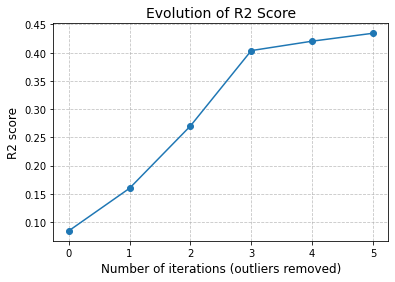

In [ ]:
x_train = np.array(outl_train.X)
y_train = np.array(outl_train.Y)
outliers_indexes2 = find_outliers_general(x_train,y_train)
print("Number of Outliers = %d"%len(outliers_indexes2))
print("Outliers found in 5.4 = {}".format(outliers_indexes))
print("Outliers found in 5.7 = {}".format(outliers_indexes2))
x_train2 = np.delete(x_train,outliers_indexes)
X_train2 = sm.add_constant(x_train2)
y_train2 = np.delete(y_train,outliers_indexes)
regr = sm.OLS(y_train2,X_train2)
OutlierFreeGeneralModel = regr.fit()

1. *What outliers does it identify?*
    
    > As we can see in the prints above, we found the 5 outliers; Three of them were the same found before in 5.4, but we found another two.
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
    > As said, we found the same outliers from 5.4 and two more.
    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

    > We can see on the above plot, with 5 outliers removed, we got a higher R2 score than removing just 3, as we did in 5.4. The graph will reflect a crescent function, but it would' be reasonable to consider all but one point in the dataset to be an outlier, that's why we set a limit of 10%. 
    

---- 


In [ ]:
from IPython.core.display import HTML
def css_styling(): styles = open("style/cs109.css", "r").read(); return HTML(styles)
css_styling()

In [ ]:
!jupyter nbconvert --execute --to PDF "cs109a_hw2.ipynb"

[NbConvertApp] Converting notebook cs109a_hw2.ipynb to PDF
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] Support files will be in cs109a_hw2_files/
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Making directory ./cs109a_hw2_files
[NbConvertApp] Writing 108069 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./noteb